# Library imports

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sna

%matplotlib inline

In [174]:
df = pd.read_csv('movies.csv')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [176]:
df.isnull().count()

name        7668
rating      7668
genre       7668
year        7668
released    7668
score       7668
votes       7668
director    7668
writer      7668
star        7668
country     7668
budget      7668
gross       7668
company     7668
runtime     7668
dtype: int64

In [177]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data Cleaning

In [178]:
# seting correct movie released year as 'correctyear'
df['correctyear'] = df['released'].str.split(',').str[1].str[:5]

In [179]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [180]:
df['released'].str.split(',').str[0][:5]

0    June 13
1     July 2
2    June 20
3     July 2
4    July 25
Name: released, dtype: object

In [181]:
df['correctyear'][:5]

0     1980
1     1980
2     1980
3     1980
4     1980
Name: correctyear, dtype: object

In [182]:
# Careating new released columns
df['newreleased'] = df['released'].str.split(',').str[0] + df['correctyear']

In [183]:
# change it's format to real dates
df['releas date'] = pd.to_datetime(df['newreleased'])

In [184]:
# droping unneccessary columns
df.drop(columns=['released','year','newreleased'],axis=0,inplace=True)

In [185]:
df['correctyear'] = df['correctyear'].replace(np.nan,0)

In [186]:
df['correctyear'] = df['correctyear'].astype('int')

In [187]:
df['correctyear'] 

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7663    2020
7664    2020
7665    2020
7666    2020
7667    2020
Name: correctyear, Length: 7668, dtype: int32

# Exploratory Data Analysis

### 1.Dose budget and gross relate with each other

Text(0.5, 1.0, 'Gross vs Budget')

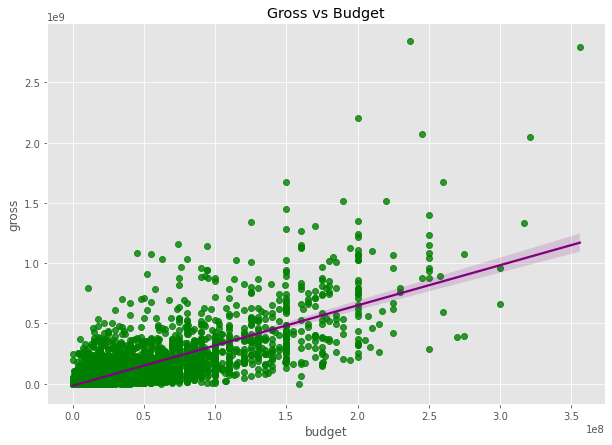

In [195]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))

sna.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'green'},line_kws={'color':'purple'})

plt.title("Gross vs Budget")

### 2. Are there any other major features which corelate with gross well

In [189]:
df.corr()

,score,votes,budget,gross,runtime,correctyear
score,1.000000,0.409182,0.076254,0.186258,0.399451,0.001653
votes,0.409182,1.000000,0.442429,0.630757,0.309212,0.056070
budget,0.076254,0.442429,1.000000,0.740395,0.320447,0.071279
gross,0.186258,0.630757,0.740395,1.000000,0.245216,0.054798
runtime,0.399451,0.309212,0.320447,0.245216,1.000000,0.027707
correctyear,0.001653,0.056070,0.071279,0.054798,0.027707,1.000000


In [190]:
df.corr().unstack()[['gross']].sort_values()

gross  correctyear    0.054798
       score          0.186258
       runtime        0.245216
       votes          0.630757
       budget         0.740395
       gross          1.000000
dtype: float64

In [191]:
corr_pairs = df.corr().unstack()

sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        gross          0.630757
gross        votes          0.630757
budget       gross          0.740395
gross        budget         0.740395
score        score          1.000000
gross        gross          1.000000
budget       budget         1.000000
votes        votes          1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64

Text(0.5, 1.0, 'Corelation count between various features ')

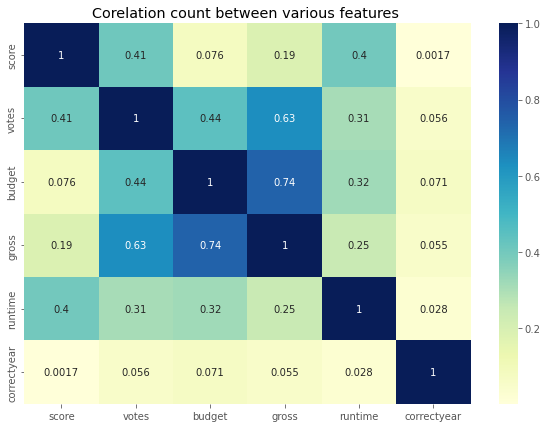

In [196]:
# printing corelation matrix 
plt.figure(figsize=(10,7))

sna.heatmap(df.corr(),annot=True,cmap='YlGnBu')

plt.title("Corelation count between various features ")

## 3.Which companies are making most profits

<AxesSubplot:ylabel='company'>

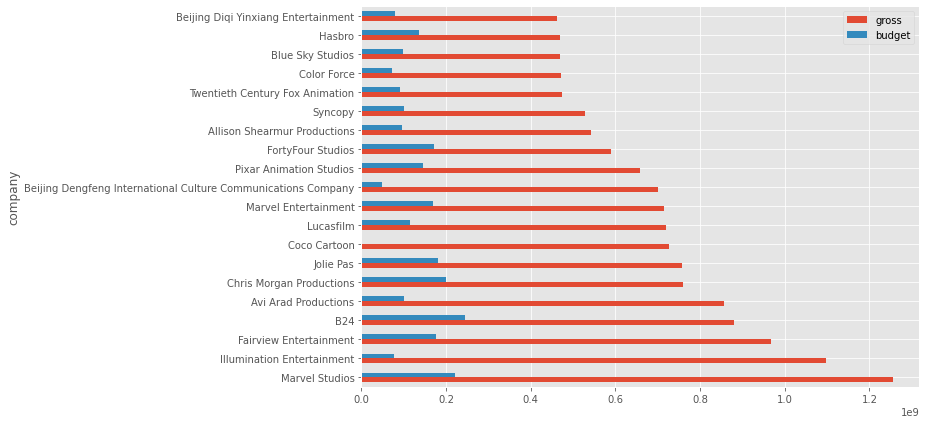

In [198]:
df.groupby('company')[['gross','budget']].mean().sort_values('gross',ascending=False).head(20).plot(kind='barh',figsize=(10,7))

### 4. Film studio's production based on genre

In [194]:
df.pivot_table(index=['company','name','genre'],values=['budget','gross','score']
               ,aggfunc=[np.sum]).query('company == ["Warner Bros.","Marvel Studios"]').head(60)

sum  \
                                                                  budget   
company        name                               genre                    
Marvel Studios Ant-Man and the Wasp               Action     162000000.0   
               Avengers: Age of Ultron            Action     250000000.0   
               Avengers: Endgame                  Action     356000000.0   
               Avengers: Infinity War             Action     321000000.0   
               Black Panther                      Action     200000000.0   
               Captain America: Civil War         Action     250000000.0   
               Doctor Strange                     Action     165000000.0   
               Guardians of the Galaxy            Action     170000000.0   
               Guardians of the Galaxy Vol. 2     Action     200000000.0   
               Iron Man 3                         Action     200000000.0   
               The Avengers                       Action     220000000.0   
               Thor: The Dark World               Action     170000000.0   
Warner Bros.   10,000 BC                          Action     105000000.0   
               300                                Action      65000000.0   
               300: Rise of an Empire             Action     110000000.0   
               42                                 Biography   40000000.0   
               A Cinderella Story                 Comedy      19000000.0   
               A Little Princess                  Drama       17000000.0   
               A Perfect Murder                   Crime       60000000.0   
               A Perfect World                    Crime       30000000.0   
               A Walk to Remember                 Drama       11800000.0   
               A.I. Artificial Intelligence       Drama      100000000.0   
               Above the Law                      Action       7500000.0   
               Addicted to Love                   Comedy             0.0   
               Alexander                          Action     155000000.0   
               Altered States                     Horror             0.0   
               American Sniper                    Action      58800000.0   
               Analyze That                       Comedy      60000000.0   
               Any Given Sunday                   Drama       55000000.0   
               Aquaman                            Action     160000000.0   
               Argo                               Biography   44500000.0   
               Arthur 2: on the Rocks             Comedy             0.0   
               Assassins                          Action      50000000.0   
               August Rush                        Drama       30000000.0   
               Batman                             Action      35000000.0   
               Batman & Robin                     Action     125000000.0   
               Batman Begins                      Action     150000000.0   
               Batman Forever                     Action     100000000.0   
               Batman Returns                     Action      80000000.0   
               Batman v Superman: Dawn of Justice Action     250000000.0   
               Battlefield Earth                  Action      73000000.0   
               Beerfest                           Comedy      17500000.0   
               Being Human                        Comedy      40000000.0   
               Best Friends                       Comedy      15000000.0   
               Black Beauty                       Adventure          0.0   
               Blade of the Immortal              Action             0.0   
               Blood Diamond                      Adventure  100000000.0   
               Body of Lies                       Action      70000000.0   
               Bronco Billy                       Action       6500000.0   
               Cats & Dogs                        Action      60000000.0   
               Catwoman                  